## Setup and Configuration

## Import necessary libraries

In [115]:
# Import necessary libraries
import sys
import os
import logging

# Append the scripts directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import custom modules
from data_loading import load_data
from data_quality import check_data_quality
from data_cleaning import preprocess_data
from check_data_types import check_data_types
from detect_outliers import detect_outliers


## Configure logging

In [116]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

## Load the data

In [117]:
# Load the data
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'
store_path = '../data/raw/store.csv'
train, test, store = load_data(train_path, test_path, store_path)

d:\sales_forecasting\scripts\data_loading.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)
2024-05-28 19:27:38,765 - INFO - Data loaded successfully


In [118]:
# Check data quality
train_quality = check_data_quality(train)

# Display data quality information
print("Train Data Head:")
print(train_quality['head'])
print("\nTrain Data Types:")
print(train_quality['dtypes'])
print("\nTrain Missing Values:")
print(train_quality['missing_values'])

2024-05-28 19:27:40,584 - INFO - Data quality check completed


Train Data Head:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Train Data Types:
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Train Missing Values:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo   

In [119]:
test_quality = check_data_quality(test)

print("\nTest Data Head:")
print(test_quality['head'])
print("\nTest Data Types:")
print(test_quality['dtypes'])
print("\nTest Missing Values:")
print(test_quality['missing_values'])

2024-05-28 19:27:43,841 - INFO - Data quality check completed



Test Data Head:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

Test Data Types:
Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

Test Missing Values:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [120]:
store_quality = check_data_quality(store)

print("\nStore Data Head:")
print(store_quality['head'])
print("\nStore Data Types:")
print(store_quality['dtypes'])
print("\nStore Missing Values:")
print(store_quality['missing_values'])


2024-05-28 19:27:47,073 - INFO - Data quality check completed



Store Data Head:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul

In [121]:
# Display head of train and test datasets
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Train Data:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Test Data:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4 

In [122]:
# Display head of train and test datasets
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Train Data:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Test Data:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4 

In [123]:
# Check data types
train_data_types = check_data_types(train)
test_data_types = check_data_types(test)
print("\nTrain Data Types:")
print(train_data_types)
print("\nTest Data Types:")
print(test_data_types)


Train Data Types:
{'Store': dtype('int64'), 'DayOfWeek': dtype('int64'), 'Date': dtype('O'), 'Sales': dtype('int64'), 'Customers': dtype('int64'), 'Open': dtype('int64'), 'Promo': dtype('int64'), 'StateHoliday': dtype('O'), 'SchoolHoliday': dtype('int64')}

Test Data Types:
{'Id': dtype('int64'), 'Store': dtype('int64'), 'DayOfWeek': dtype('int64'), 'Date': dtype('O'), 'Open': dtype('float64'), 'Promo': dtype('int64'), 'StateHoliday': dtype('O'), 'SchoolHoliday': dtype('int64')}


In [124]:
# Detect outliers
train_outliers = detect_outliers(train)
test_outliers = detect_outliers(test)
print("\nTrain Outliers:")
print(train_outliers)
print("\nTest Outliers:")
print(test_outliers)


Train Outliers:
{'Store': {'lower_bound': -557.0, 'upper_bound': 1675.0, 'num_outliers': 0, 'outlier_indices': Index([], dtype='int64')}, 'DayOfWeek': {'lower_bound': -4.0, 'upper_bound': 12.0, 'num_outliers': 0, 'outlier_indices': Index([], dtype='int64')}, 'Sales': {'lower_bound': -2466.5, 'upper_bound': 14049.5, 'num_outliers': 26694, 'outlier_indices': Index([      6,      23,      24,      83,     107,     124,     191,     210,
           250,     258,
       ...
       1015502, 1015541, 1015574, 1015677, 1015735, 1015767, 1015796, 1015821,
       1016093, 1016356],
      dtype='int64', length=26694)}, 'Customers': {'lower_bound': -243.0, 'upper_bound': 1485.0, 'num_outliers': 38095, 'outlier_indices': Index([      3,      24,     124,     210,     250,     258,     261,     319,
           334,     335,
       ...
       1015962, 1015965, 1015993, 1016006, 1016076, 1016093, 1016356, 1016517,
       1016656, 1016827],
      dtype='int64', length=38095)}, 'Open': {'lower_bound': 

## Data Cleaning
### We will preprocess the data to handle missing values, outliers, and ensure correct data types.

In [130]:
# Check initial data quality
train_quality = check_data_quality(train)
test_quality = check_data_quality(test)

logger.info("Initial Train Data Quality Check")
logger.info(train_quality)

logger.info("Initial Test Data Quality Check")
logger.info(test_quality)

# Preprocess the data
train_clean = preprocess_data(train, store)
test_clean = preprocess_data(test, store)

# Check data quality after preprocessing
train_clean_quality = check_data_quality(train_clean)
test_clean_quality = check_data_quality(test_clean)

logger.info("Train Data Quality Check After Preprocessing")
logger.info(train_clean_quality)

logger.info("Test Data Quality Check After Preprocessing")
logger.info(test_clean_quality)

# Check data types
train_data_types = check_data_types(train_clean)
test_data_types = check_data_types(test_clean)
logger.info("Train Data Types")
logger.info(train_data_types)
logger.info("Test Data Types")
logger.info(test_data_types)

# Detect outliers
train_outliers = detect_outliers(train_clean)
test_outliers = detect_outliers(test_clean)
logger.info("Train Outliers")
logger.info(train_outliers)
logger.info("Test Outliers")
logger.info(test_outliers)

# Handling outliers - Example approach: Removing outliers
def remove_outliers(df, outliers_info):
    for feature, info in outliers_info.items():
        # Get only the indices that exist in the dataframe
        valid_indices = info['outlier_indices'][info['outlier_indices'].isin(df.index)]
        df = df.drop(valid_indices)
    return df

# Remove outliers from train data
train_clean_no_outliers = remove_outliers(train_clean, train_outliers)
logger.info("Outliers removed from train data")

# Check data quality after removing outliers
train_clean_no_outliers_quality = check_data_quality(train_clean_no_outliers)
logger.info("Train Data Quality Check After Removing Outliers")
logger.info(train_clean_no_outliers_quality)# Check initial data quality
train_quality = check_data_quality(train)
test_quality = check_data_quality(test)

logger.info("Initial Train Data Quality Check")
logger.info(train_quality)

logger.info("Initial Test Data Quality Check")
logger.info(test_quality)

# Preprocess the data
train_clean = preprocess_data(train, store)
test_clean = preprocess_data(test, store)

# Check data quality after preprocessing
train_clean_quality = check_data_quality(train_clean)
test_clean_quality = check_data_quality(test_clean)

logger.info("Train Data Quality Check After Preprocessing")
logger.info(train_clean_quality)

logger.info("Test Data Quality Check After Preprocessing")
logger.info(test_clean_quality)

# Check data types
train_data_types = check_data_types(train_clean)
test_data_types = check_data_types(test_clean)
logger.info("Train Data Types")
logger.info(train_data_types)
logger.info("Test Data Types")
logger.info(test_data_types)

# Detect outliers
train_outliers = detect_outliers(train_clean)
test_outliers = detect_outliers(test_clean)
logger.info("Train Outliers")
logger.info(train_outliers)
logger.info("Test Outliers")
logger.info(test_outliers)

# Handling outliers - Example approach: Removing outliers
def remove_outliers(df, outliers_info):
    for feature, info in outliers_info.items():
        # Get only the indices that exist in the dataframe
        valid_indices = info['outlier_indices'][info['outlier_indices'].isin(df.index)]
        df = df.drop(valid_indices)
    return df

# Remove outliers from train data
train_clean_no_outliers = remove_outliers(train_clean, train_outliers)
logger.info("Outliers removed from train data")

# Check data quality after removing outliers
train_clean_no_outliers_quality = check_data_quality(train_clean_no_outliers)
logger.info("Train Data Quality Check After Removing Outliers")
logger.info(train_clean_no_outliers_quality)

# Function to check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]

2024-05-28 19:48:12,697 - INFO - Data quality check completed
2024-05-28 19:48:12,705 - INFO - Data quality check completed
2024-05-28 19:48:12,705 - INFO - Initial Train Data Quality Check
2024-05-28 19:48:12,705 - INFO - {'head':    Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  , 'dtypes': Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64


In [131]:
train_missing_values = check_missing_values(train_clean_no_outliers)
logger.info("Missing Values in Train Data After Cleaning")
logger.info(train_missing_values)

2024-05-28 19:48:58,568 - INFO - Missing Values in Train Data After Cleaning
2024-05-28 19:48:58,568 - INFO - Series([], dtype: int64)


In [132]:
# Check for missing values in cleaned data
test_missing_values = check_missing_values(test_clean)
logger.info("Missing Values in Test Data After Cleaning")
logger.info(test_missing_values)

2024-05-28 19:49:13,582 - INFO - Missing Values in Test Data After Cleaning
2024-05-28 19:49:13,585 - INFO - Open    11
dtype: int64


In [133]:
# Option 1: Impute missing values with mode
test_clean['Open'].fillna(test_clean['Open'].mode()[0], inplace=True)
logger.info("Missing values in 'Open' column of test data have been imputed with the mode.")

# Verify missing values have been handled
test_missing_values_after_imputation = check_missing_values(test_clean)
logger.info("Missing Values in Test Data After Imputation")
logger.info(test_missing_values_after_imputation)

C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_22276\515613729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_clean['Open'].fillna(test_clean['Open'].mode()[0], inplace=True)
2024-05-28 20:16:14,159 - INFO - Missing values in 'Open' column of test data have been imputed with the mode.
2024-05-28 20:16:14,169 - INFO - Missing Values in Test Data After Imputation
2024-05-28 20:16:14,170 - INFO - Series([], dtype: int64)


In [136]:
# Display remaining missing values in train and test datasets
print("\nTrain Data Missing Values After Cleaning:")
print(check_missing_values(train_clean))



Train Data Missing Values After Cleaning:
Series([], dtype: int64)


In [135]:
print("\nTest Data Missing Values After Cleaning:")
print(check_missing_values(test_clean))


Test Data Missing Values After Cleaning:
Series([], dtype: int64)


## Exploratory Data Analysis
### Distribution of Promotions in Training and Test Sets

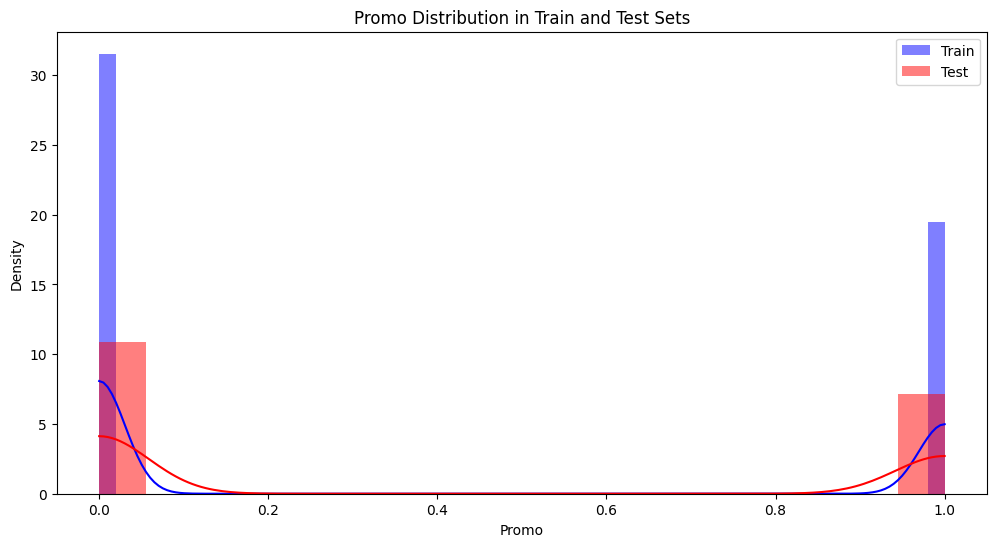

2024-05-28 20:40:20,781 - INFO - Promo distribution plotted for train and test sets


In [138]:
def plot_promo_distribution(train_clean, test_clean):
    plt.figure(figsize=(12, 6))
    sns.histplot(train['Promo'], color='blue', label='Train', kde=True, stat="density", linewidth=0)
    sns.histplot(test['Promo'], color='red', label='Test', kde=True, stat="density", linewidth=0)
    plt.title('Promo Distribution in Train and Test Sets')
    plt.xlabel('Promo')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    logger.info("Promo distribution plotted for train and test sets")

plot_promo_distribution(train_clean, test_clean)

### Sales Behavior Before, During, and After Holidays

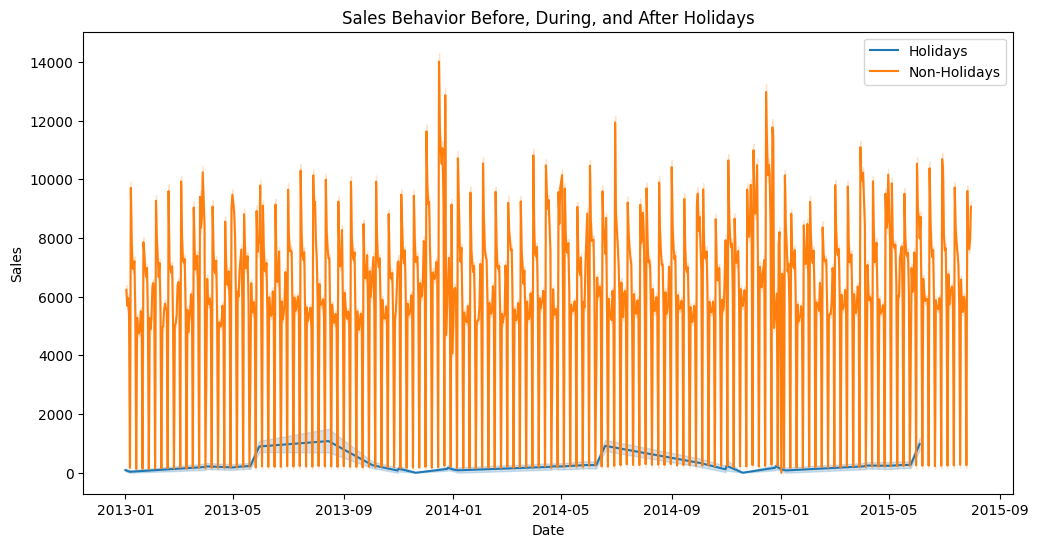

2024-05-28 20:41:37,309 - INFO - Sales behavior before, during, and after holidays plotted


In [139]:
def plot_sales_during_holidays(df):
    holidays = df[df['StateHoliday'] != '0']
    non_holidays = df[df['StateHoliday'] == '0']
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=holidays, x='Date', y='Sales', label='Holidays')
    sns.lineplot(data=non_holidays, x='Date', y='Sales', label='Non-Holidays')
    plt.title('Sales Behavior Before, During, and After Holidays')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    logger.info("Sales behavior before, during, and after holidays plotted")

plot_sales_during_holidays(train_clean)

### Seasonal Purchase Behaviors

2024-05-28 20:42:10,196 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 20:42:10,736 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


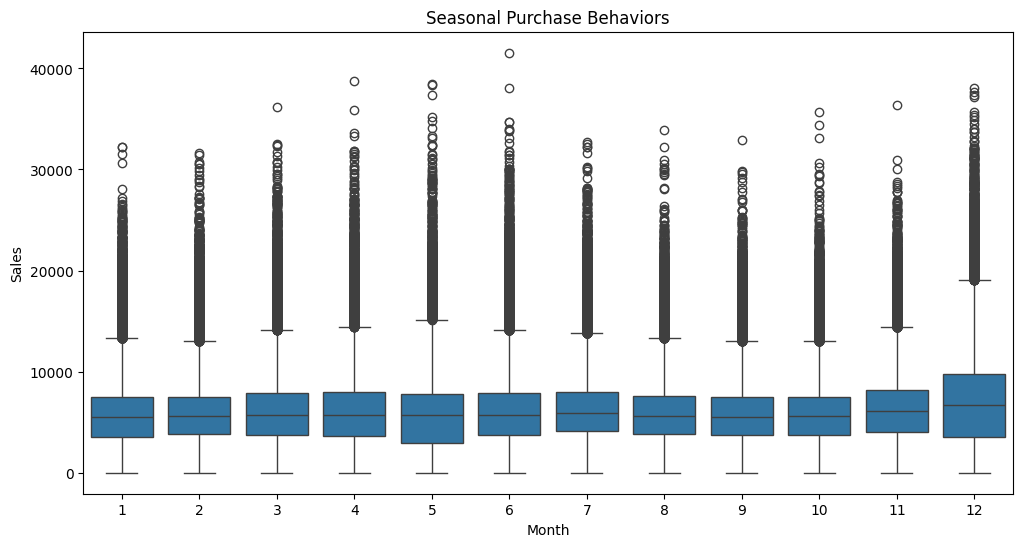

2024-05-28 20:42:11,140 - INFO - Seasonal purchase behavior plotted


In [140]:
def plot_seasonal_behavior(df):
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Sales', data=df)
    plt.title('Seasonal Purchase Behaviors')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()
    logger.info("Seasonal purchase behavior plotted")

plot_seasonal_behavior(train_clean)

### Correlation Between Sales and Number of Customers

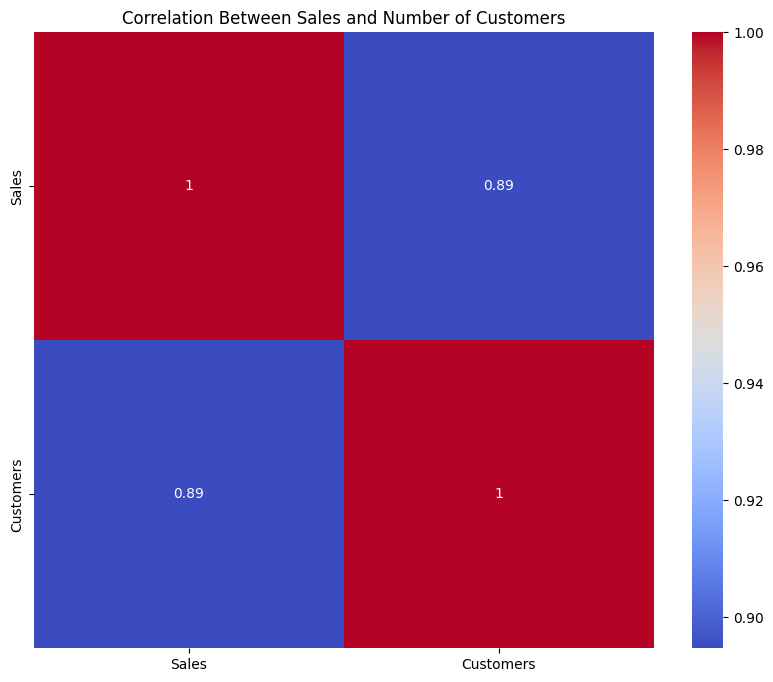

2024-05-28 20:42:31,229 - INFO - Correlation between sales and number of customers plotted


In [141]:
def plot_sales_customers_correlation(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[['Sales', 'Customers']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Sales and Number of Customers')
    plt.show()
    logger.info("Correlation between sales and number of customers plotted")

plot_sales_customers_correlation(train_clean)

### Impact of Promotions on Sales and Customer Count

2024-05-28 20:42:43,443 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 20:42:44,072 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


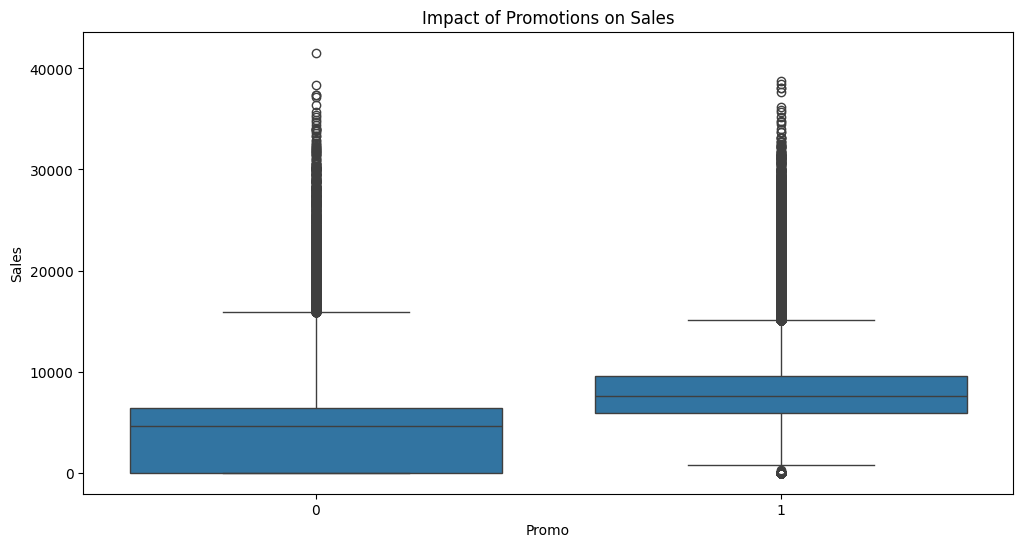

2024-05-28 20:42:45,047 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 20:42:45,586 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


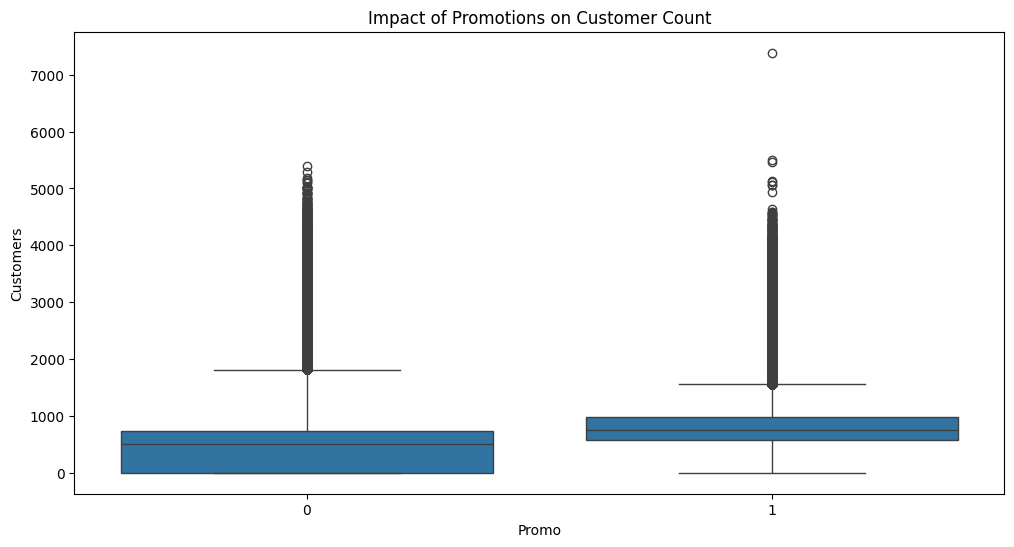

2024-05-28 20:42:45,947 - INFO - Impact of promotions on sales and customer count plotted


In [142]:
def plot_promo_impact(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Promo', y='Sales', data=df)
    plt.title('Impact of Promotions on Sales')
    plt.xlabel('Promo')
    plt.ylabel('Sales')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Promo', y='Customers', data=df)
    plt.title('Impact of Promotions on Customer Count')
    plt.xlabel('Promo')
    plt.ylabel('Customers')
    plt.show()
    logger.info("Impact of promotions on sales and customer count plotted")

plot_promo_impact(train_clean)

### Trends of Customer Behavior During Store Opening and Closing Times

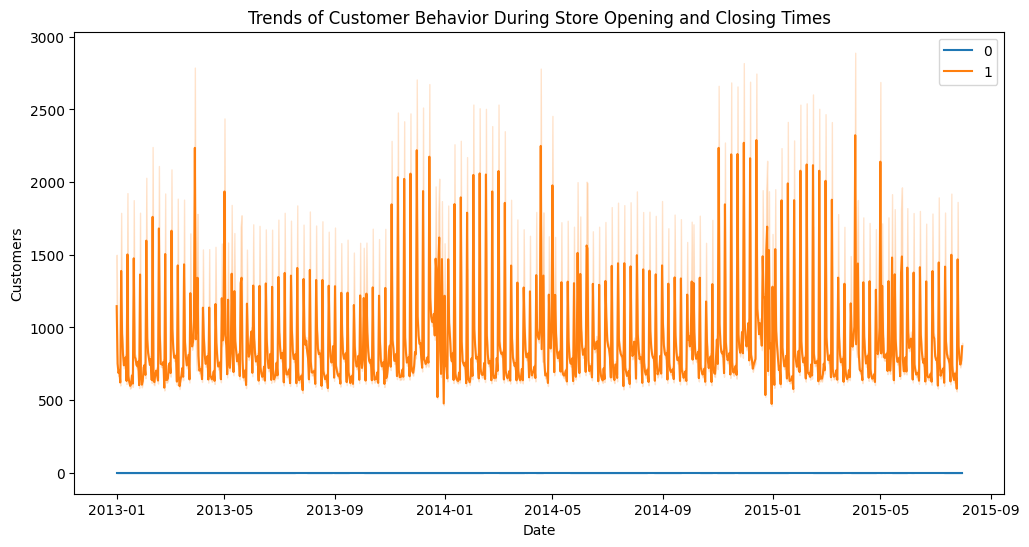

2024-05-28 20:43:35,424 - INFO - Trends of customer behavior during store opening and closing times plotted


In [143]:
def plot_store_opening_closing(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Customers', hue='Open')
    plt.title('Trends of Customer Behavior During Store Opening and Closing Times')
    plt.xlabel('Date')
    plt.ylabel('Customers')
    plt.legend()
    plt.show()
    logger.info("Trends of customer behavior during store opening and closing times plotted")

plot_store_opening_closing(train_clean)

### Store Weekday Opening Analysis

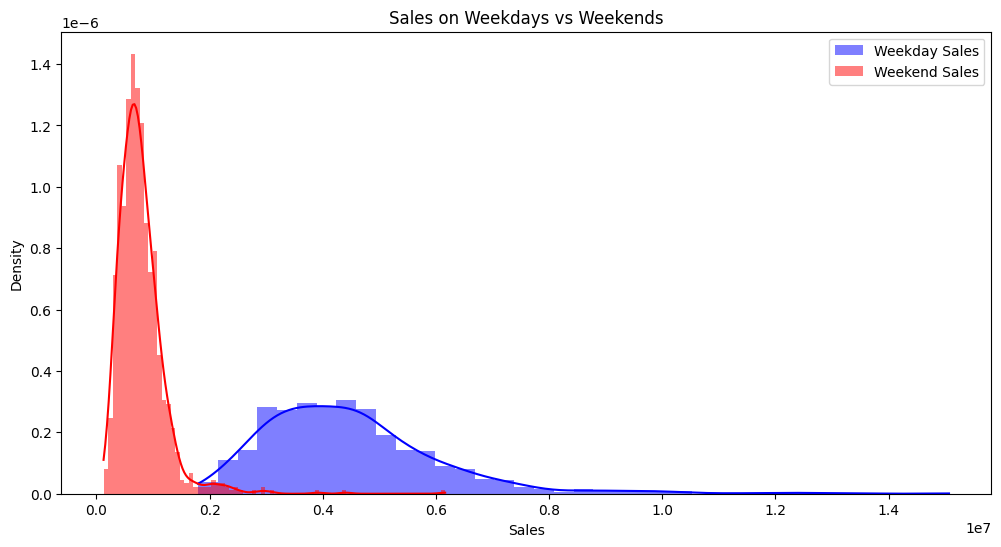

2024-05-28 20:44:00,789 - INFO - Sales on weekdays vs weekends plotted


In [144]:
def plot_weekday_opening_analysis(df):
    weekdays = df[df['Open'] == 1].groupby(['Store', 'DayOfWeek'])['Sales'].sum().unstack().fillna(0)
    weekdays['TotalSales'] = weekdays.sum(axis=1)
    weekends = weekdays[[5, 6]].sum(axis=1)
    weekdays['WeekendSales'] = weekends
    weekdays['WeekdaySales'] = weekdays['TotalSales'] - weekdays['WeekendSales']

    plt.figure(figsize=(12, 6))
    sns.histplot(weekdays['WeekdaySales'], color='blue', label='Weekday Sales', kde=True, stat="density", linewidth=0)
    sns.histplot(weekends, color='red', label='Weekend Sales', kde=True, stat="density", linewidth=0)
    plt.title('Sales on Weekdays vs Weekends')
    plt.xlabel('Sales')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    logger.info("Sales on weekdays vs weekends plotted")

plot_weekday_opening_analysis(train_clean)

### Assortment Type Impact on Sales

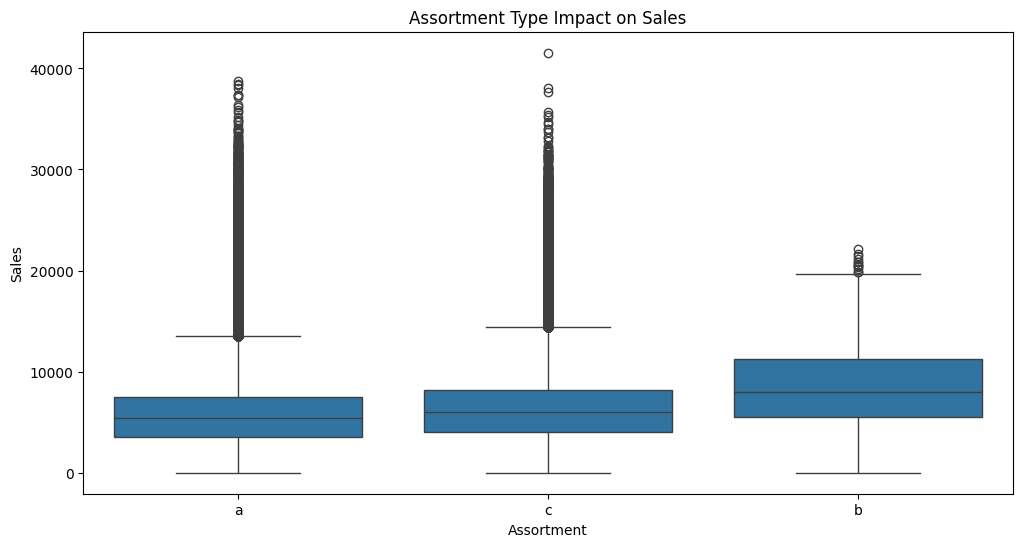

2024-05-28 20:44:26,606 - INFO - Assortment type impact on sales plotted


In [145]:
def plot_assortment_type_impact(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Assortment', y='Sales', data=df)
    plt.title('Assortment Type Impact on Sales')
    plt.xlabel('Assortment')
    plt.ylabel('Sales')
    plt.show()
    logger.info("Assortment type impact on sales plotted")

plot_assortment_type_impact(train_clean)

### Distance to Competitor Impact on Sales

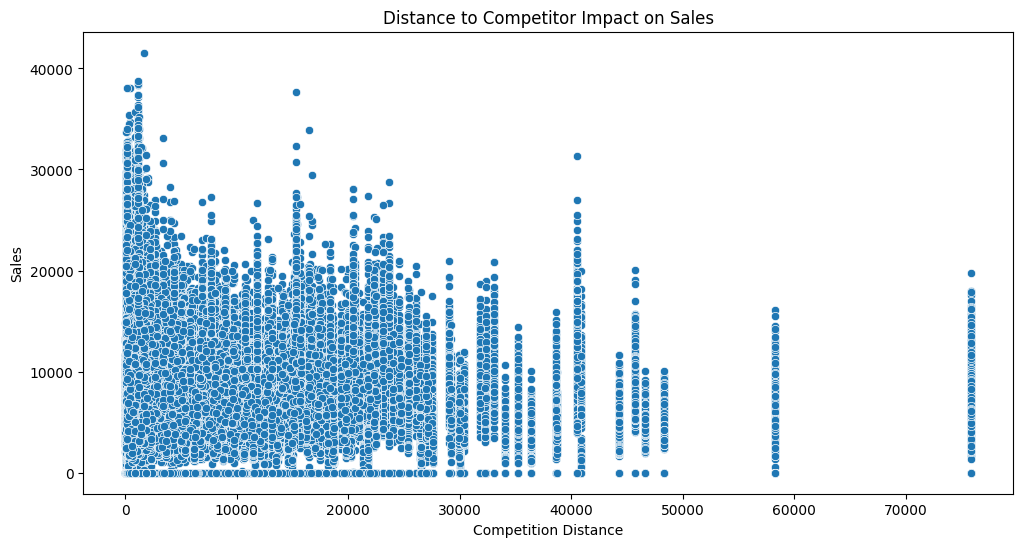

2024-05-28 20:44:39,618 - INFO - Distance to competitor impact on sales plotted


In [146]:
def plot_competition_distance_impact(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=df)
    plt.title('Distance to Competitor Impact on Sales')
    plt.xlabel('Competition Distance')
    plt.ylabel('Sales')
    plt.show()
    logger.info("Distance to competitor impact on sales plotted")

plot_competition_distance_impact(train_clean)

### Impact of Opening/Reopening New Competitors

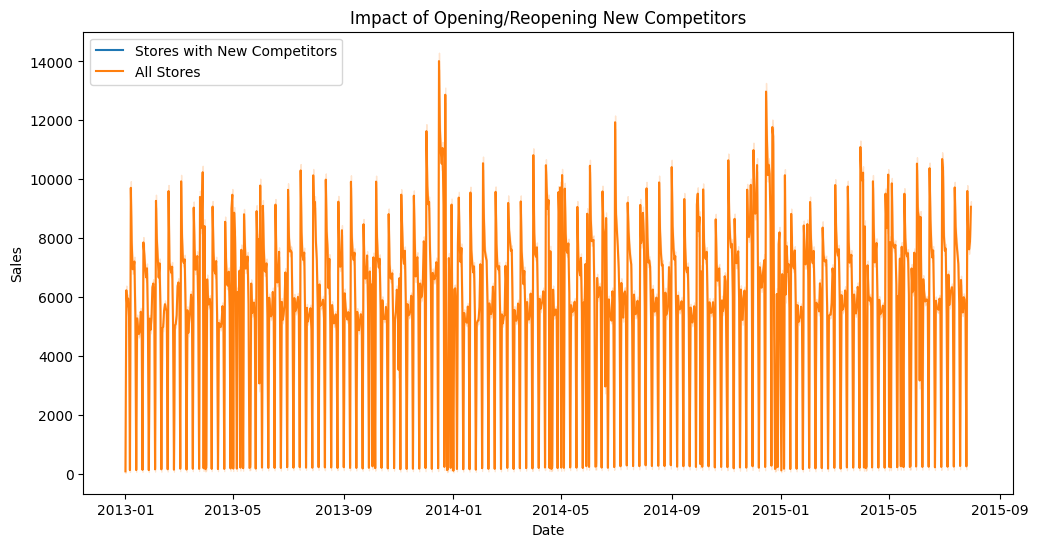

2024-05-28 20:45:20,709 - INFO - Impact of opening/reopening new competitors plotted


In [147]:
def plot_new_competitors_impact(df):
    # Identify stores with NA in CompetitionDistance initially and later have values
    new_competitors = df[(df['CompetitionOpenSinceMonth'] > 0) & (df['CompetitionDistance'] == 0)]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=new_competitors, x='Date', y='Sales', label='Stores with New Competitors')
    sns.lineplot(data=df, x='Date', y='Sales', label='All Stores')
    plt.title('Impact of Opening/Reopening New Competitors')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    logger.info("Impact of opening/reopening new competitors plotted")

plot_new_competitors_impact(train_clean)